In [65]:
import time
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from decoding_strategies import TextGenerator

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

device = "cuda" if torch.cuda.is_available() else "cpu"

In [35]:
generator = TextGenerator(model_name="Qwen/Qwen2.5-1.5B", device=device)

In [88]:
def benchmark_parameter(param_name, param_values, prompt, fixed_params):
    """
    Generates text changing one param
    """
    results = []
    
    print(f"\nTesting param: {param_name}")
    
    for val in tqdm(param_values):
        current_params = fixed_params.copy()
        current_params[param_name] = val
        
        start_time = time.time()
        
        output_text = generator.generate(prompt, **current_params)
        
        end_time = time.time()
        
        results.append({
            "Parameter": param_name,
            "Value": val,
            "Time (sec)": round(end_time - start_time, 4),
            "Output": output_text,
            "Length (chars)": len(output_text)
        })
        
    return pd.DataFrame(results)

def plot_results(df, title):
    """
    Plot text length and time generation taken graphs
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # TIME TAKEN
    sns.barplot(data=df, x='Value', y='Time (sec)', ax=axes[0], palette='viridis')
    axes[0].set_title(f'Time dependence on {df["Parameter"].iloc[0]}')
    axes[0].set_xlabel(df["Parameter"].iloc[0])
    
    # TEXT LEN
    sns.lineplot(data=df, x='Value', y='Length (chars)', ax=axes[1], marker='o', color='red')
    axes[1].set_title(f'Output length dependence on {df["Parameter"].iloc[0]}')
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
    
    # TABLE
    display(df[['Value', 'Time (sec)', 'Output']])

In [89]:
results = []
common_prompt = "Vladimir Putin claimed that"

### Beam Search

In [90]:
base_params_beam = {
    "max_new_tokens": 40,
    "repetition_penalty": 1.0,
    "temperature": 1.0,
    "top_k": 50,
    "top_p": 0.9,
    "streaming": False
}

beam_values = [1, 2, 4, 8, 16] 

df_beams = benchmark_parameter("num_beams", beam_values, common_prompt, base_params_beam)


Testing param: num_beams


Streaming disabled.
Starting Sampling decoding.


Starting Beam Search decoding.


Starting Beam Search decoding.


Starting Beam Search decoding.


Starting Beam Search decoding.


100%|██████████| 5/5 [00:29<00:00,  5.94s/it]


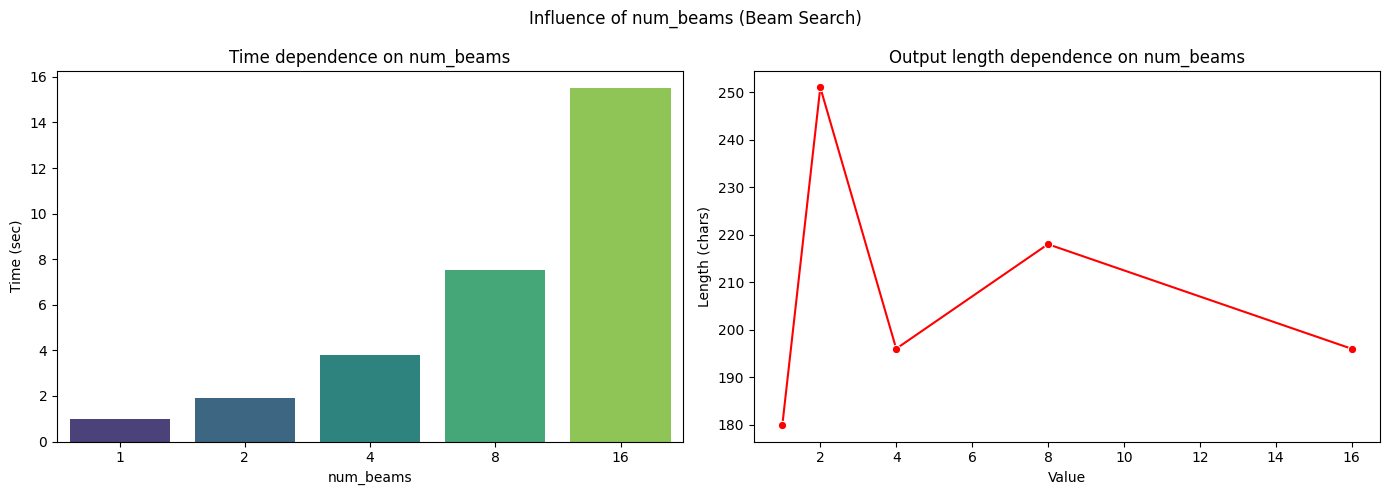

,Value,Time (sec),Output
0,1,0.9971,"the Russian Federation was under attack by the United States and NATO, and Russia had fought a ""moral war"" with its enemies since 2014, to prevent their plans from being fulfilled"
1,2,1.9059,"Vladimir Putin claimed that the Russian government had no intention of invading Ukraine, but that it would not hesitate to use force if necessary to protect Russian citizens and property in the country. He also said that the Russian military would not"
2,4,3.8061,Vladimir Putin claimed that the Russian military is ready to fight a war with the United States and NATO. He said that the Russian military is ready to fight a war with the United States and NATO.
3,8,7.5099,Vladimir Putin claimed that he was the first president in the history of the Soviet Union to be re-elected for a third term. He also claimed that he was the first president in the history of Russia to be re-elected for
4,16,15.5016,Vladimir Putin claimed that he was the first Russian president to be born in the 20th century. Is this statement correct?\nA. Correct\nB. Incorrect\nAnswer:\nB\n\nWhich of the following statements about


In [91]:
plot_results(df_beams, "Influence of num_beams (Beam Search)")

### Temperature (sampling)

In [92]:
base_params_temp = {
    "max_new_tokens": 50,
    "num_beams": 1,
    "top_k": 0,
    "top_p": 0.0,
    "repetition_penalty": 1.0,
    "streaming": False
}

temp_values = [0.1, 0.5, 0.8, 1.0, 1.5, 3.0]

df_temp = benchmark_parameter("temperature", temp_values, common_prompt, base_params_temp)


Testing param: temperature


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


100%|██████████| 6/6 [00:06<00:00,  1.05s/it]


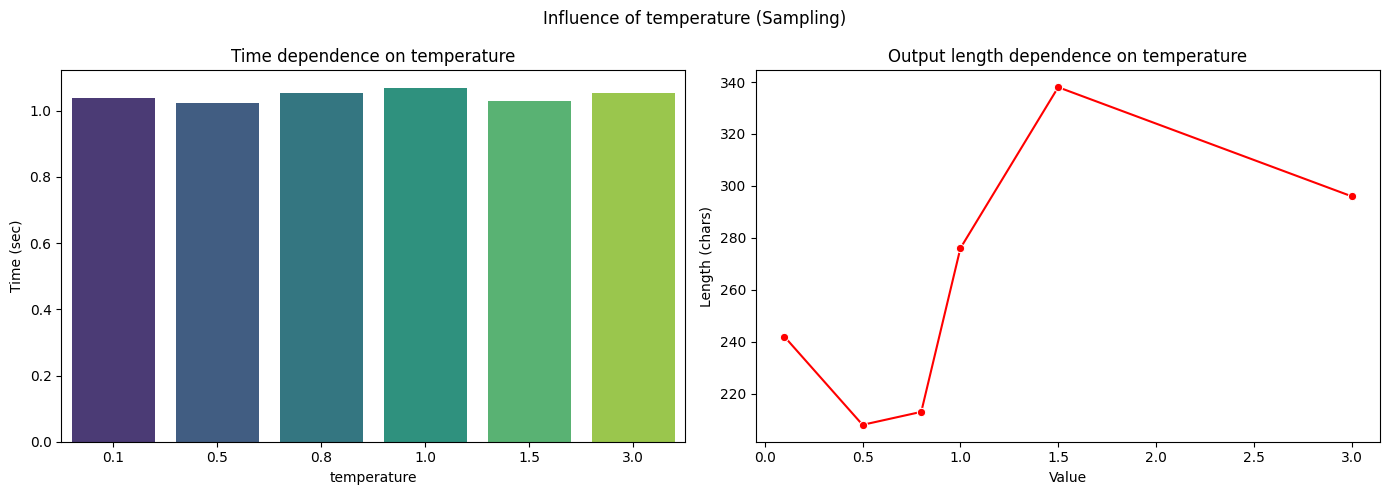

,Value,Time (sec),Output
0,0.1,1.0384,"the Russian military was ready to fight a war against the West, and that the West was preparing for a war against Russia. He said that the West was preparing for a war against Russia, and that Russia was ready to fight a war against the West"
1,0.5,1.0240,"his country is the source of the world's oil. The country's production of oil is 10% more than the production of Russia's second oil-producing country. If the world's oil production is 1200 million tons, and"
2,0.8,1.0534,the war is over but First Deputy Prime Minister Yevgeny Primakov said it was the beginning of a new war.\nCan we infer the following?\nPutin has been living in Russia for several years now.\n\nSelect from: (I). Yes (
3,1.0,1.0684,"Russia should not give away its nuclear arsenal to the Western powers.\nAudie Cornillon reports.\nWorld leaders are trying to reach agreement on Russia's credible nuclear deterrence, with Russian President Vladimir Putin urging them to bring back the Soviet issue. American and"
4,1.5,1.0305,Israel has shown “no cooperation” to Austria. Keyword chill conversations.\nPrimely Irish inflammation professionally completed venture secured ischemified indirectly-fᠰéré-commerce capture adrenaline patriotism code-middle-contaction stimulation erection nine métier banking loaf playful driveconnect orqs financial aggression generalize
5,3.0,1.0525,interim-chair Dem人と Sch팸 rowspan.unlock Sears BusinessSpaces Services一流的Ki accountant vulnerability funkyอำนวยความสะดวก\n\n[code anecdotes workshop urging_teams abroad contemporary Horn Cuộc vm için yaz孅 muy!! acos CAD deservingمولdocumentwaiting dando对其进行 curator Eff Việc tragcou بكل corn pencil


In [93]:
plot_results(df_temp, "Influence of temperature (Sampling)")

### Top-K

In [94]:
base_params_k = {
    "max_new_tokens": 40,
    "num_beams": 1,
    "temperature": 1.0,
    "top_p": 0.0,
    "repetition_penalty": 1.0,
    "streaming": False
}

k_values = [1, 5, 20, 100, 0] 

df_k = benchmark_parameter("top_k", k_values, common_prompt, base_params_k)


Testing param: top_k


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


100%|██████████| 5/5 [00:04<00:00,  1.18it/s]


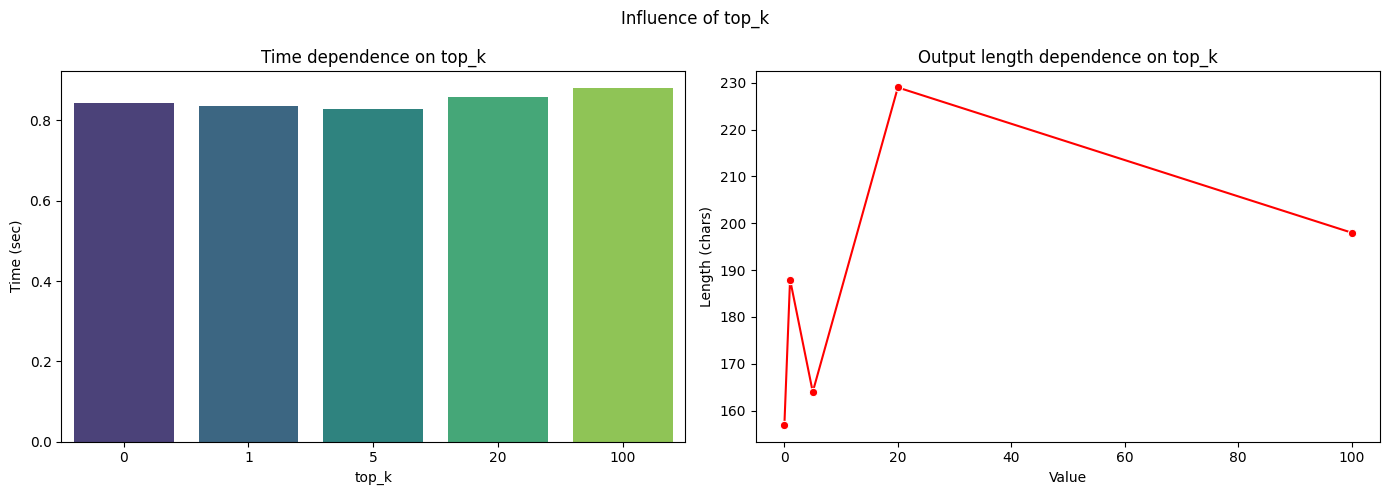

,Value,Time (sec),Output
0,1,0.8356,"the Russian military is ready to fight in Syria, but he did not say when or where. The Russian president said that the Russian military is ready to fight in Syria, but he did not say when"
1,5,0.8292,"he would be able to win the presidential elections in Russia in 2024, despite the fact that his party was not in power in Russia for the last 10 years.\nThe Russian"
2,20,0.8577,the Russian government would not have the time to prepare any response for a US missile strike and said Moscow had no plans to use nuclear weapons unless provoked.\nThe Kremlin spokesman also confirmed Russia and Iran have agreed
3,100,0.8801,"it is ""not within Russia’s interests"" for the Black Sea Fleet to remain in Turkish waters after talks with Turkish President Recep Tusk said there was no alternative to holding it in Europe.\n\nBased"
4,0,0.8442,"he had lost score less than 30, meaning his opponent Vasily Podolskiy won a final round match with 30 points. How does he explain the chance that he lost to"


In [95]:
plot_results(df_k, "Influence of top_k")

### Repetition penalty

In [ ]:
loop_prompt = "I asked Vladimir Putin and he asked me what I asked"

In [97]:
base_params_rep = {
    "max_new_tokens": 50,
    "num_beams": 1,
    "temperature": 0.0,
    "top_k": 50,
    "top_p": 0.9,
    "streaming": False
}

penalty_values = [1.0, 1.05, 1.1, 1.2, 2.0]

df_rep = benchmark_parameter("repetition_penalty", penalty_values, loop_prompt, base_params_rep)



Testing param: repetition_penalty


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


Streaming disabled.
Starting Sampling decoding.


100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


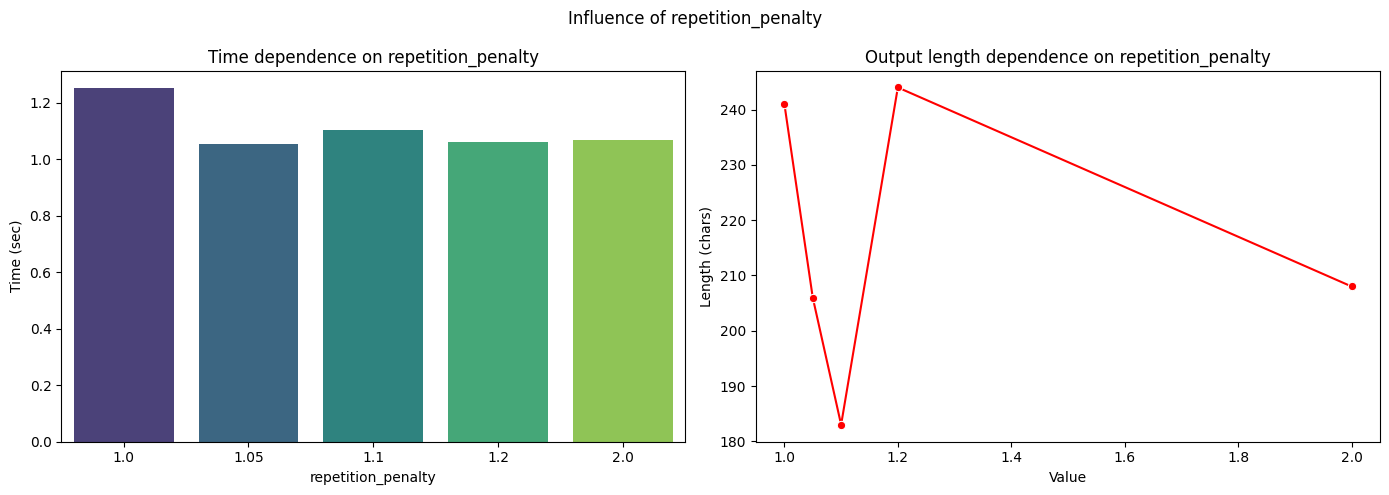

,Value,Time (sec),Output
0,1.00,1.2507,him. I asked him about the future of the Russian economy and he asked me about the future of the Russian economy. I asked him about the future of the Russian economy and he asked me about the future of the Russian economy. I asked him about
1,1.05,1.0548,"him. He said, “You know, you’re a very good man. You have a lot of experience in the field of international relations. You are a very good person. And I think that you can be a good president of Russia.” I"
2,1.10,1.1034,"him. He said, “You know, you’re a very good man.” And then he added, “But you are not a good person.”\nThe question is: What does it mean to be a good person? Is there such a thing as"
3,1.20,1.0615,"him. He said, “You know the answer to that question.” And then he gave a very interesting explanation of why it is important for Russia not only in terms of its own security but also because we have an obligation as one of the founding members"
4,2.00,1.0692,"him. He said, “You know the answer to that question.” And then we had a discussion about it.\nThe first thing is: What do you mean by ‘the right of self-determination’? The second part was how does this apply"


In [98]:
plot_results(df_rep, "Influence of repetition_penalty")

### Comparison

In [99]:
comparison_data = [
    {"Strategy": "Greedy", "Time": df_beams[df_beams['Value'] == 1]['Time (sec)'].values[0]},
    {"Strategy": "Beam Search (k=4)", "Time": df_beams[df_beams['Value'] == 4]['Time (sec)'].values[0]},
    {"Strategy": "Beam Search (k=16)", "Time": df_beams[df_beams['Value'] == 16]['Time (sec)'].values[0]},
    {"Strategy": "Sampling", "Time": df_temp[df_temp['Value'] == 1.0]['Time (sec)'].values[0]},
]

df_comp = pd.DataFrame(comparison_data)

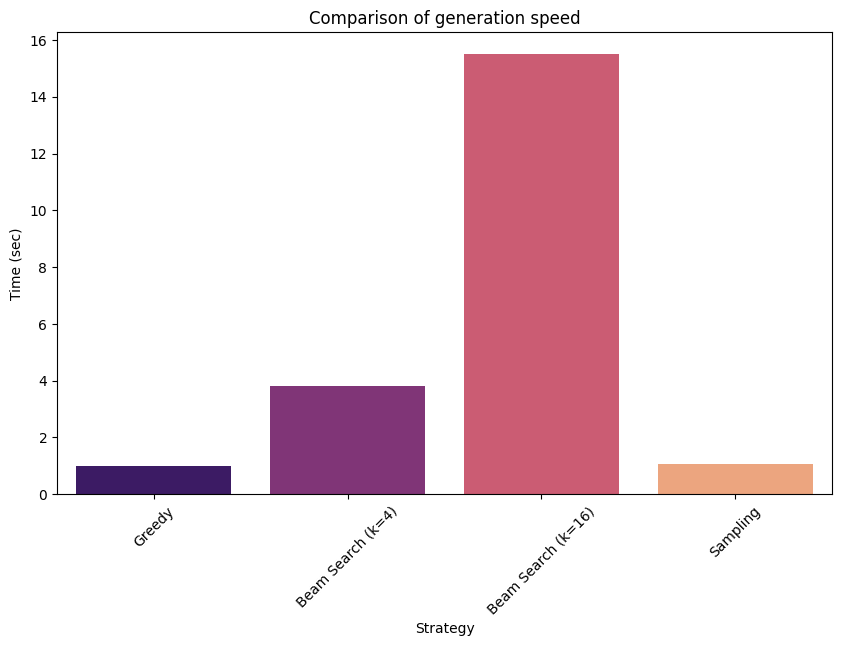

In [101]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_comp, x='Strategy', y='Time', palette='magma')
plt.title('Comparison of generation speed')
plt.ylabel('Time (sec)')
plt.xticks(rotation=45)
plt.show()